<a href="https://colab.research.google.com/github/stevengregori92/Learn-TimeSeriesForecast/blob/main/AAPL_Naive_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 41.5 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366828 sha256=2754fa4d1c66d800973633a2504917d7d8d30f5c1cdffc6eaa014f26804bc248
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32177 sha256=325d0a34dac83e8562af665a4bc8125389c9fa11bf03837a08e1b10310aec3f7
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
!gdown https://drive.google.com/uc?id=1J3VFSqOiVeIoQqWuVZnEojzAT9r8z3l7
!unzip /content/stock.zip

Downloading...
From: https://drive.google.com/uc?id=1J3VFSqOiVeIoQqWuVZnEojzAT9r8z3l7
To: /content/stock.zip
100% 3.17M/3.17M [00:00<00:00, 52.6MB/s]
Archive:  /content/stock.zip
  inflating: AABA_2006-01-01_to_2018-01-01.csv  
  inflating: AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: CVX_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: IBM_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,10.34,10.68,10.32,10.68,201853036,AAPL
2006-01-04,10.73,10.85,10.64,10.71,155225609,AAPL
2006-01-05,10.69,10.70,10.54,10.63,112396081,AAPL
2006-01-06,10.75,10.96,10.65,10.90,176139334,AAPL
2006-01-09,10.96,11.03,10.82,10.86,168861224,AAPL
...,...,...,...,...,...,...
2017-12-22,174.68,175.42,174.50,175.01,16349444,AAPL
2017-12-26,170.80,171.47,169.68,170.57,33185536,AAPL
2017-12-27,170.10,170.78,169.71,170.60,21498213,AAPL


In [5]:
df.drop(columns=['Open', 'High', 'Low', 'Volume', 'Name'], inplace=True)

#Resampling Data Time Series


https://pandas.pydata.org/docs/user_guide/timeseries.html#offset-aliases


<Axes: xlabel='Date'>

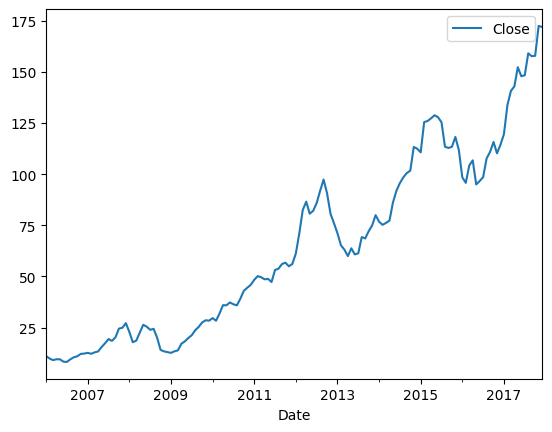

In [6]:
df.resample('M').mean().plot()

In [7]:
df = df.resample('M').mean()
df

,Close
Date,
2006-01-31,11.115500
2006-02-28,9.930526
2006-03-31,9.146957
2006-04-30,9.572632
2006-05-31,9.540455
...,...
2017-08-31,159.021304
2017-09-30,157.608500
2017-10-31,157.817273


<Axes: xlabel='Date'>

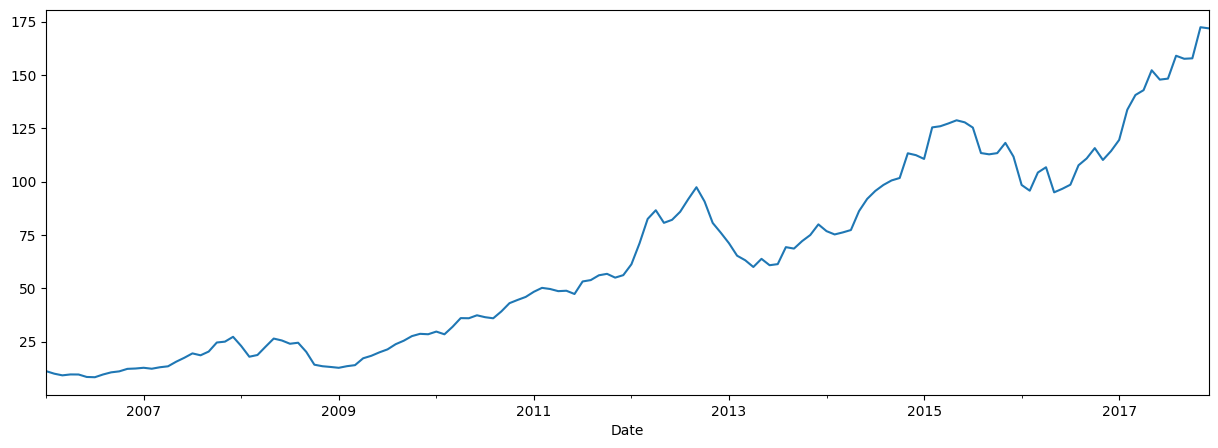

In [8]:
df.Close.plot(figsize=(15,5))

#Naive Forecasting

One-Shift Forecasting

In [9]:
pred = df.copy()
pred = pred.shift()

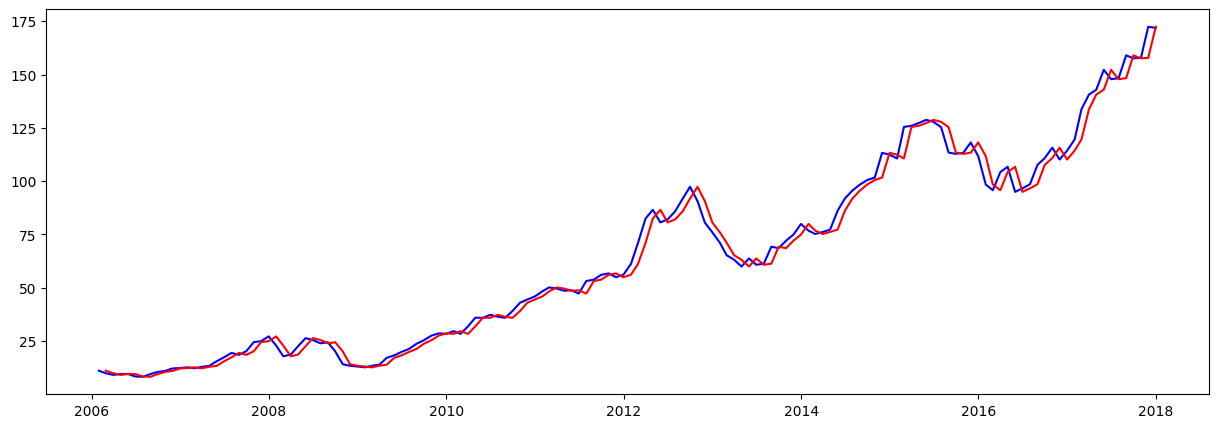

In [10]:
plt.figure(figsize=(15,5))
plt.plot(df, 'b-')
plt.plot(pred, 'r-')

Mean Forecasting

In [11]:
pred = df.copy()
pred.Close = [df.loc[:date].Close.mean() for date in df.index]
pred = pred.shift()

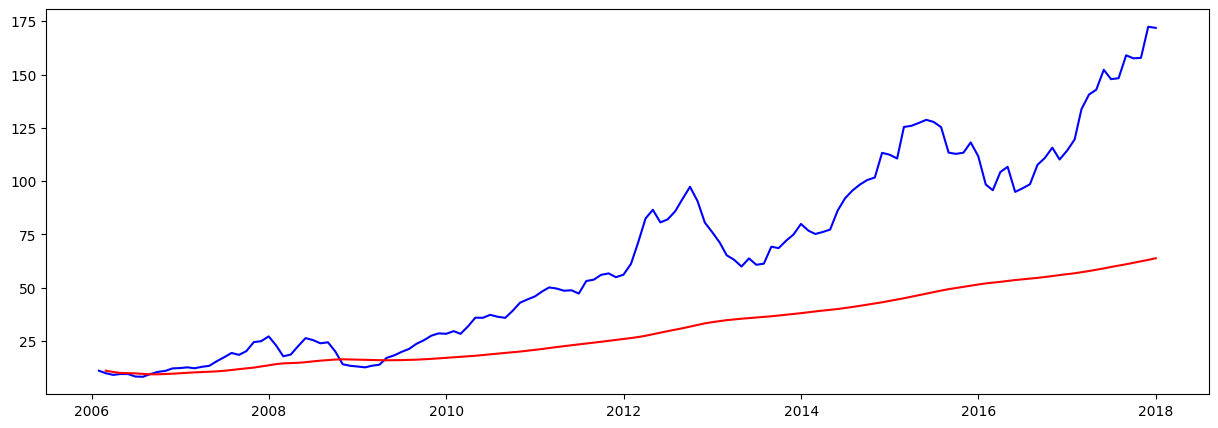

In [12]:
plt.figure(figsize=(15,5))
plt.plot(df, 'b-')
plt.plot(pred, 'r-')

Moving Average/Rolling Mean Forecasting

In [13]:
pred = df.copy()
pred.Close = df.rolling(3).mean()
pred = pred.shift()

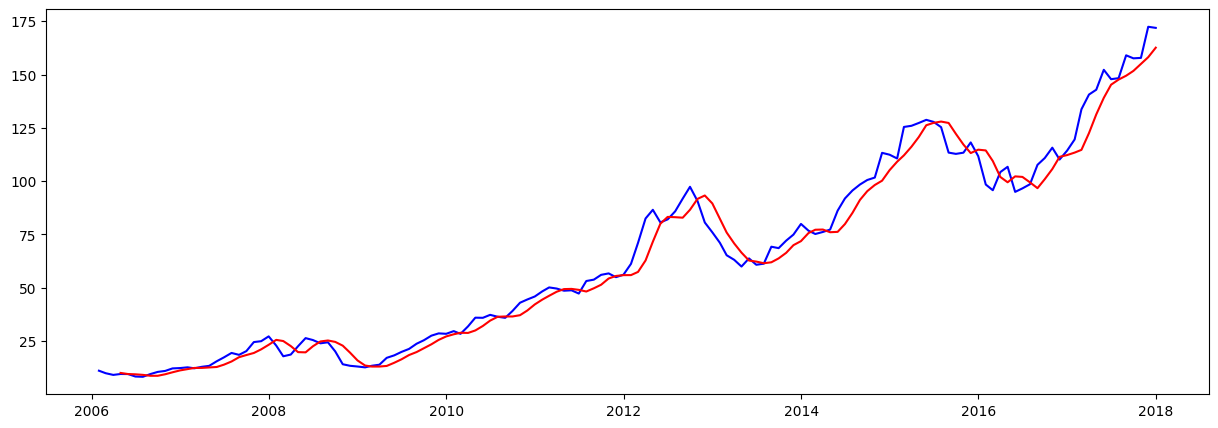

In [14]:
plt.figure(figsize=(15,5))
plt.plot(df, 'b-')
plt.plot(pred, 'r-')

In [15]:
from jcopml.time_series import auto_ets

<ipython-input-16-025ab8b25465>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('M').mean()


<Axes: xlabel='Date'>

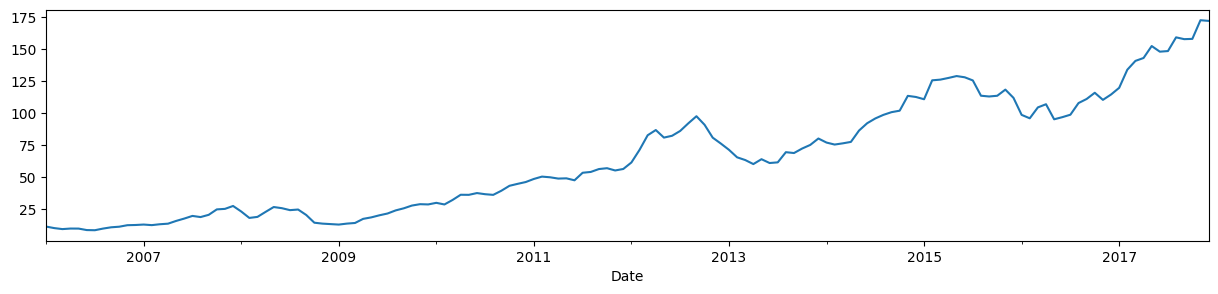

In [16]:
df = pd.read_csv('AAPL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
df = df.resample('M').mean()
series = df.Close
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

###Training

In [17]:
model, cv_results = auto_ets(X_train, scoring='mse')

  0%|          | 0/30 [00:00<?, ?it/s]

In [18]:
cv_results.head()

,trend,seasonal,damped,boxcox,mse_0,mse_1,mse_2,mse_3,mean_mse
15,add,mul,True,False,66.319393,126.114136,210.084590,296.982644,174.875191
11,add,add,True,False,45.001754,183.348571,236.533924,343.526781,202.102758
17,add,mul,False,False,74.238366,101.837919,241.602437,457.240997,218.729930
9,add,None,False,False,28.598839,228.772545,219.830317,400.205770,219.351868
13,add,add,False,False,49.031203,156.575076,222.568256,491.900709,230.018811


###Forecast

In [19]:
pred = model.predict(len(X_train)-10, len(X_train)+50)

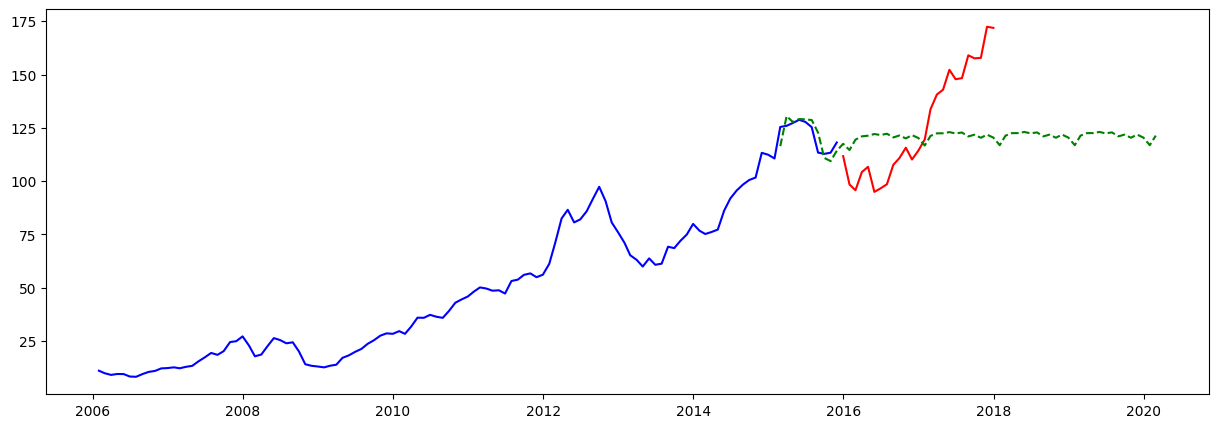

In [20]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')